In [62]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Definir la función evalPoly
def evalPoly(coeficientes, dominio, console=False):

    """
    # ***Función:*** evalPoly
    - **Descripcion:** Evalua un polinomio dado una lista de puntos y sus coeficientes
    - **Parámetros:**
        - *coeficientes:* Lista de coeficientes del polinomio de la forma $[a_n, a_{n-1}, \\ldots, a_1, a_0]$
        - *dominio:* Lista de valores a evaluar en el polinomio
        - *console:* Valor booleando. Permite mostrar los mensajes de procesos
    - **Valor de Retorno:** Una lista de imagenes del dominio evaluado en el polinomio
    """

    # Obtener el grado del polinomio
    grado = np.shape(coeficientes)[0] - 1
    
    if console:
        print("Coeficientes: ", coeficientes)
        print("Dominio: ", dominio)

    # Crear la imagen    
    imagen = np.empty((0, grado))
    dominio_ = np.array(dominio)
    if console:
        print("Dominio_: ", dominio_)
    
    # Crear un ciclo para evaluar el polinomio
    imagen = np.empty((0, grado))

    for x in dominio_:
        suma = 0
        for n,c in enumerate(coeficientes):
            suma = suma + c*x**(grado-n)

        imagen = np.append(imagen, suma)

    # Devolver la imagen
    
    return imagen

In [64]:
# Definimos la función: MultiplicacionSintetica
def MultiplicacionSintetica(raices, console=False):

    """
    ## ***Función***: MultiplicacionSintetica
    - **Descripción:** Dada una lista de puntos, las raíces de un polinomio, calcula los coeficientes del polinomio
    - **Parámetros:**
        - *raices:* Lista de raices del polinomio
        - *console:* Valor booleano por defecto en False. Si esta en True permite ver mensajes de los procesos en la consola
    - **Valor de Retorno:** Una lista con los coeficientes del polinomio
    """

    # Crear la lista de salida
    coeficientes = np.array([1, 0])

    # Transponer las raíces
    raices_ = np.array(raices)
    raices_ = -1*raices_

    # Crear un ciclo para recorrer las raíces del polinomio
    for r in raices_:
        
        # Multiplicar la raíz por la lista de coeficientes
        producto = r*coeficientes
        producto = np.insert(producto, 0, 0)
        producto = producto[:-1]

        # Sumar el producto con los coeficientes
        coeficientes = producto +  coeficientes

        # Agregar un nuevo cero a la lista de coeficientes
        coeficientes = np.append(coeficientes, 0)
        if console:
            print("Coeficientes: ", coeficientes)
            print("Producto: ", producto)

    # Eliminar el último elemento
    coeficientes = coeficientes[:-1]
    return coeficientes

In [65]:
# Probar la multiplicación sintética
poly = MultiplicacionSintetica([1,3,5])
print(poly)

[  1  -9  23 -15]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[-15.   0.   3.   0.  -3.   0.  15.  48. 105. 192. 315.]


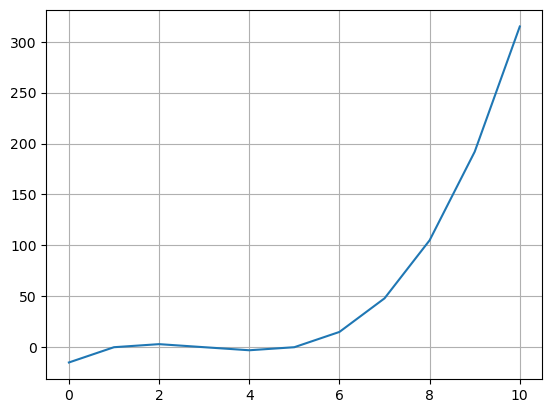

In [66]:
# Definir puntos a aproximar
x = np.linspace(0, 10, 11)
y = evalPoly(poly, x)

print(x)
print(y)
plt.plot(x,y)
plt.grid(True)
plt.show()

In [123]:
# Método de la Bisección
def biseccion(poly, a, b, epsilon):
    
    # Calcular punto medio
    c = (a+b)/2
    y = evalPoly(poly, np.array([c]))-epsilon
    itera = 0
    
    while abs(y[0]) >= 1e-1:
        
        y_a = evalPoly(poly, np.array([a]))-epsilon
        y_c = evalPoly(poly, np.array([c]))-epsilon
        
        if y_a[0]*y_c[0] < 0:
            b = c
        else:
            a = c
            
        c = (a+b)/2
        y = evalPoly(poly, np.array([c]))-epsilon 
        
        itera += 1
        if itera > 250:
            return c
            
    return c

[  1  -9  23 -15]
[0.46461344 0.86922919 0.86411443 0.62306479]
potencias,  [8 4 2 1]

Iteración:  0 _____________________________
Coeficientes:  [0.46461344 0.86922919 0.86411443 0.62306479]
(x,y) =  0.0 -15.0
y_*:  0.6230647876154531  y_i:  -15.0
Error:  15.623064787615453 ; Signo:  15.623064787615453
Solución:  2.036796044088538
Gradiente:  [0.54084945 0.26553933 0.13037109 0.06400793]

Iteración:  0 , 0 _____________________________
Coeficientes:  [0.21332752 0.63841465 0.75145889 0.5831837 ]
(x,y) =  0.0 -15.0
y_*:  0.5831837017923077  y_j:  -15.0
Error:  15.583183701792308 ; Signo:  15.583183701792308
Solución:  2.039205679726728
Gradiente:  [0.54416037 0.26684918 0.13085938 0.06417174]
Nuevo vector de coeficientes j:  [0.09724314 0.46805423 0.65312345 0.54575979]

Iteración:  0 , 1 _____________________________
Coeficientes:  [0.09724314 0.46805423 0.65312345 0.54575979]
(x,y) =  1.0 0.0
y_*:  1.7641806025507707  y_j:  0.0
Error:  1.7641806025507707 ; Signo:  1.7641806025507707


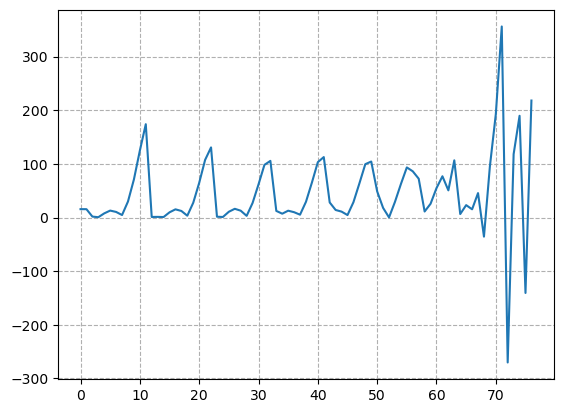

In [129]:
# Probar la multiplicación sintética
poly = MultiplicacionSintetica([1,3,5])
print(poly)

# Definir puntos a aproximar
x = np.linspace(0, 10, 11)
y = evalPoly(poly, x)

# Definir el método de aproximación
p3 = np.random.rand(4)
print(p3)

# Crear un ciclo para recorrer todos los nodos
alpha = 1
vError = []

def gradiente(coef, x_):
    n = len(coef) - 1
    return np.array([x_**(n-i) for i in range(n+1)])
    
print("potencias, ", gradiente(np.array([1,1,1,1]),2))   

for i, n in enumerate(x):
    # Evaluar
    print("")
    print("Iteración: ", i, "_____________________________")
    print("Coeficientes: ", p3)
    x_ = np.array([x[i]])
    x_g = np.array([1,1,1,1])
    y_ = evalPoly(p3, x_)
    print("(x,y) = ", x[i], y[i])
    print("y_*: ", y_[0]," y_i: ", y[i])

    # Comparo con y[i]
    error_ = y_ - y[i]
    error = error_
    vError.append(error)
    print("Error: ", error[0], "; Signo: ",error_[0])

    # Actualizo los coeficientes
    x_ = error
    x_t = biseccion(np.array([1,1,1,1]), -x_, x_, error)
    x_ = x_t[0]
    grad = gradiente(np.array([1,1,1,1]),x_)
    grad = grad / error
    print("Solución: ", x_)
    print("Gradiente: ", grad)
    
    p3 = p3 - p3*grad
    
    for j in range(i, len(x)):
        # Evaluar
        print("")
        print("Iteración: ", i,",",j,"_____________________________")
        print("Coeficientes: ", p3)
        x_ = np.array([x[j]])
        x_g = np.array([1,1,1,1])
        y_ = evalPoly(p3, x_)
        print("(x,y) = ", x[j], y[j])
        print("y_*: ", y_[0]," y_j: ", y[j])

        # Comparo con y[i]
        error_ = y_ - y[j]
        error = np.abs(error_)
        vError.append(error)
        print("Error: ", error[0], "; Signo: ",error_[0])

        # Actualizo los coeficientes
        x_ = error
        x_t = biseccion(np.array([1,1,1,1]), -x_, x_, error)
        x_ = x_t[0]
        grad = gradiente(np.array([1,1,1,1]),x_)
        grad = grad / error
        print("Solución: ", x_)
        print("Gradiente: ", grad)
        
        if error_>0:
            p3 = p3 - p3*grad
        else:
            p3 = p3 + p3*grad            
            
        print("Nuevo vector de coeficientes j: ", p3)
        
    print("Nuevo vector de coeficientes i: ", p3)
    
plt.plot(vError)
plt.grid(linestyle='--')
plt.show()